In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [4]:
df.label.value_counts(normalize = True)

female    0.5
male      0.5
Name: label, dtype: float64

# EDA

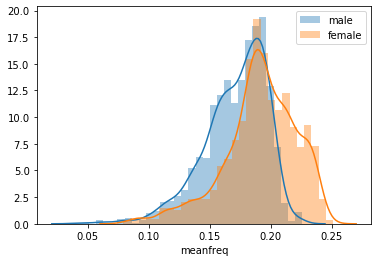

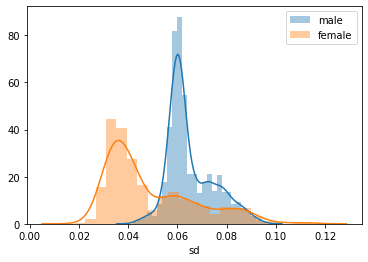

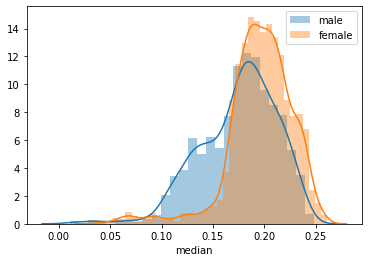

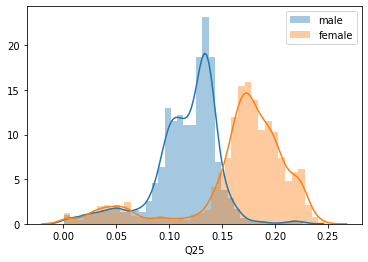

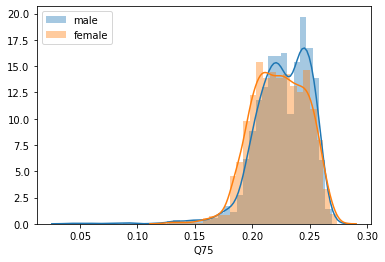

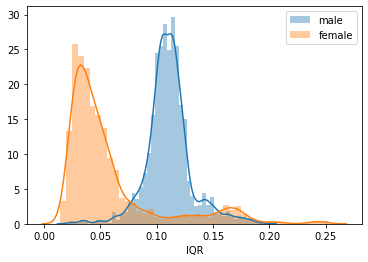

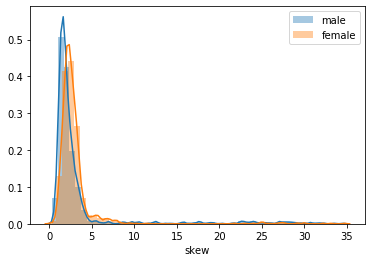

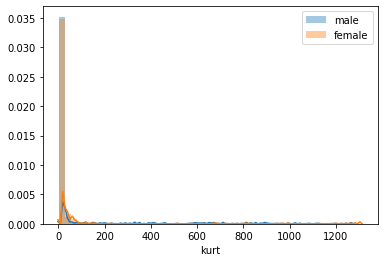

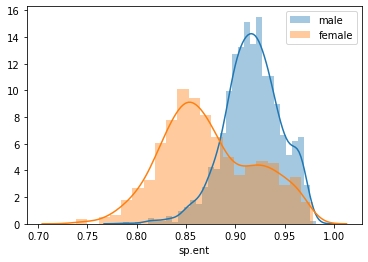

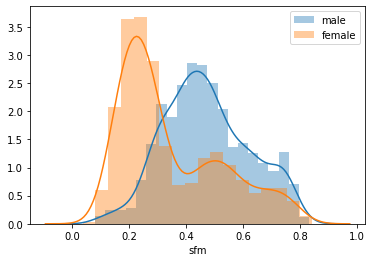

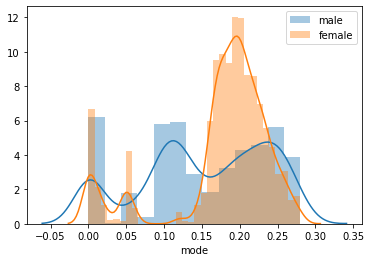

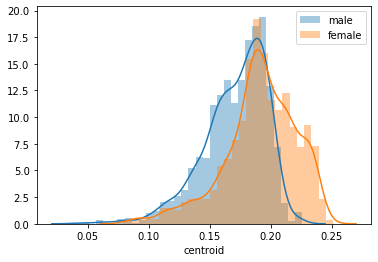

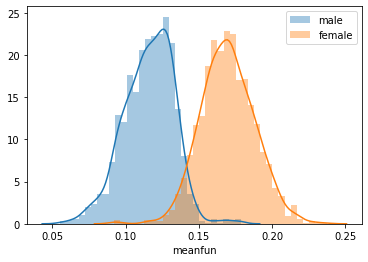

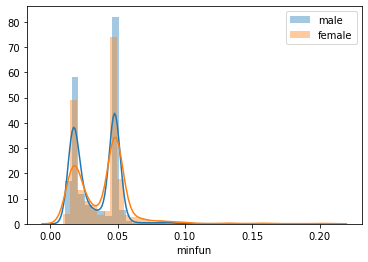

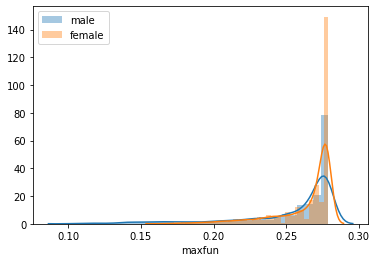

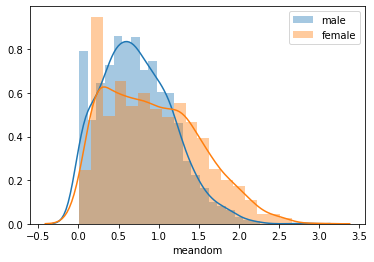

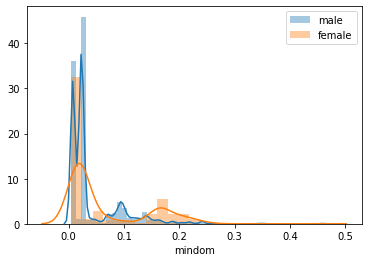

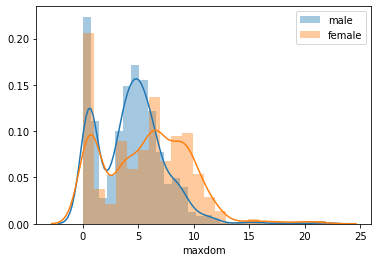

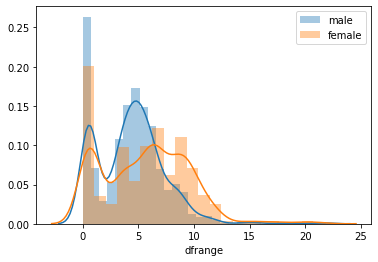

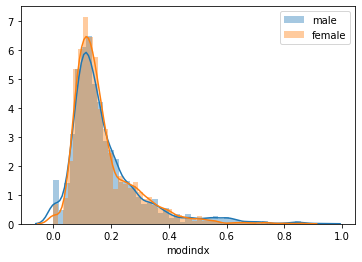

In [11]:
for col in df.drop('label', axis = 1).columns:
    fig,axes = plt.subplots(nrows = 1, ncols = 1)
    sns.distplot(df[df['label'] == 'male'][col],ax = axes, label = 'male')
    sns.distplot(df[df['label'] == 'female'][col],ax = axes, label = 'female')
    plt.legend()
    plt.show()

In [12]:
from xgboost import XGBClassifier

In [19]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [14]:
x = df.drop('label', axis = 1)
y = df['label']

In [18]:
cross_val_score(XGBClassifier(),x,y,cv = 5)

array([0.9384858 , 0.98107256, 0.97791798, 0.98264984, 0.96360759])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      female       0.98      0.97      0.97       309
        male       0.97      0.98      0.98       325

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [21]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
model = [RandomForestClassifier,GradientBoostingClassifier,DecisionTreeClassifier,LogisticRegression,
         SVC,XGBClassifier]
model_name = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression',
              'SVC', 'XGBClassifier']
acc_scores = []

for model, name in zip(model,model_name):
    scores = cross_val_score(model(),x,y,cv = 5)
    acc_scores.append([scores.mean(), name])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/skl

In [27]:
np.array(acc_scores)[:,0]

array(['0.9630675238589627', '0.9684302998841993', '0.9482210597771832',
       '0.88163858163958', '0.6748452661422354', '0.9687467555804018'],
      dtype='<U32')

In [29]:
df_acc = pd.DataFrame(acc_scores, columns = ('score', 'model'))
df_acc

,score,model
0,0.963068,RandomForestClassifier
1,0.968430,GradientBoostingClassifier
2,0.948221,DecisionTreeClassifier
3,0.881639,LogisticRegression
4,0.674845,SVC
5,0.968747,XGBClassifier


Text(0, 0.5, 'Names')

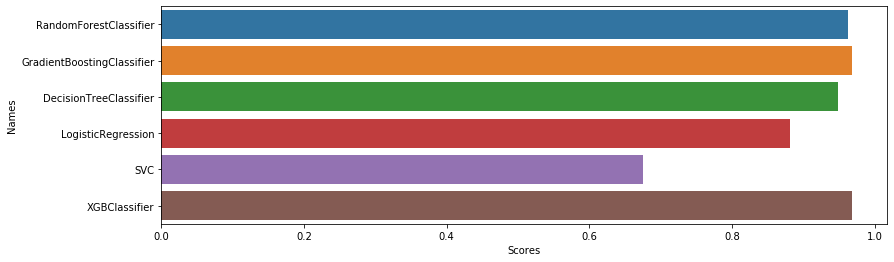

In [30]:
plt.figure(figsize=(13,4))
sns.barplot(x=df_acc['score'] , y = df_acc['model'])
plt.xlabel('Scores')
plt.ylabel('Names')

In [31]:
from sklearn.model_selection import learning_curve

In [32]:
train_size, train_score, test_score = learning_curve(XGBClassifier(), x,y,train_sizes=[0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
train_size

array([ 211,  422,  633,  844, 1056, 1267, 1478, 1689, 1900, 2112])

In [34]:
test_score

array([[0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.84659091, 0.93560606, 0.88731061],
       [0.85132576, 0.93465909, 0.93371212],
       [0.85984848, 0.98200758, 0.97537879],
       [0.93181818, 0.98011364, 0.97443182],
       [0.94602273, 0.98106061, 0.97537879]])

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

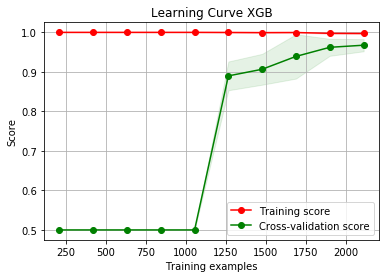

In [37]:
plot_learning_curve(XGBClassifier(), 'Learning Curve XGB', x, y,cv =3,train_sizes=np.linspace(0.1,1,10))

# Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('PCA', PCA(n_components = 10)),
    ('model', XGBClassifier()),    
])

In [41]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
      

In [42]:
pipe.predict([X_test.iloc[0]])

array(['female'], dtype=object)

In [43]:
prediction_pipe = pipe.predict(X_test)
print(classification_report(y_test,prediction_pipe))

              precision    recall  f1-score   support

      female       0.97      0.95      0.96       309
        male       0.96      0.98      0.97       325

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param = {'n_estimator' : [10,50,100,200], 'learning_rate' : [0.1,0.15,0.25,0.5], 'max_depth' : [1,3,5,7] }

In [46]:
grid = GridSearchCV(XGBClassifier(), param, cv = 3, verbose = 2)

In [47]:
grid.fit(x,y)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] learning_rate=0.1, max_depth=1, n_estimator=10 ..................
[CV] ... learning_rate=0.1, max_depth=1, n_estimator=10, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimator=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ... learning_rate=0.1, max_depth=1, n_estimator=10, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimator=10 ..................
[CV] ... learning_rate=0.1, max_depth=1, n_estimator=10, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimator=50 ..................
[CV] ... learning_rate=0.1, max_depth=1, n_estimator=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimator=50 ..................
[CV] ... learning_rate=0.1, max_depth=1, n_estimator=50, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimator=50 ..................
[CV] ... learning_rate=0.1, max_depth=1, n_estimator=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimator=100 .................
[CV] .. learning_rate=0.1, max_depth=1, n_estimator=100, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimator=100 .................
[CV] .. learning_rate=0.1, max_depth=1, n_estimator=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimator=100 .................
[CV] .

[CV] . learning_rate=0.15, max_depth=1, n_estimator=200, total=   0.1s
[CV] learning_rate=0.15, max_depth=3, n_estimator=10 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=10, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=10 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=10, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=10 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=10, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=50 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=50, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=50 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=50, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=50 .................
[CV] .. learning_rate=0.15, max_depth=3, n_estimator=50, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, n_estimator=100 ................
[CV] .

[CV] . learning_rate=0.25, max_depth=3, n_estimator=200, total=   0.3s
[CV] learning_rate=0.25, max_depth=3, n_estimator=200 ................
[CV] . learning_rate=0.25, max_depth=3, n_estimator=200, total=   0.3s
[CV] learning_rate=0.25, max_depth=3, n_estimator=200 ................
[CV] . learning_rate=0.25, max_depth=3, n_estimator=200, total=   0.3s
[CV] learning_rate=0.25, max_depth=5, n_estimator=10 .................
[CV] .. learning_rate=0.25, max_depth=5, n_estimator=10, total=   0.3s
[CV] learning_rate=0.25, max_depth=5, n_estimator=10 .................
[CV] .. learning_rate=0.25, max_depth=5, n_estimator=10, total=   0.3s
[CV] learning_rate=0.25, max_depth=5, n_estimator=10 .................
[CV] .. learning_rate=0.25, max_depth=5, n_estimator=10, total=   0.3s
[CV] learning_rate=0.25, max_depth=5, n_estimator=50 .................
[CV] .. learning_rate=0.25, max_depth=5, n_estimator=50, total=   0.3s
[CV] learning_rate=0.25, max_depth=5, n_estimator=50 .................
[CV] .

[CV] .. learning_rate=0.5, max_depth=5, n_estimator=100, total=   0.3s
[CV] learning_rate=0.5, max_depth=5, n_estimator=100 .................
[CV] .. learning_rate=0.5, max_depth=5, n_estimator=100, total=   0.3s
[CV] learning_rate=0.5, max_depth=5, n_estimator=200 .................
[CV] .. learning_rate=0.5, max_depth=5, n_estimator=200, total=   0.2s
[CV] learning_rate=0.5, max_depth=5, n_estimator=200 .................
[CV] .. learning_rate=0.5, max_depth=5, n_estimator=200, total=   0.3s
[CV] learning_rate=0.5, max_depth=5, n_estimator=200 .................
[CV] .. learning_rate=0.5, max_depth=5, n_estimator=200, total=   0.3s
[CV] learning_rate=0.5, max_depth=7, n_estimator=10 ..................
[CV] ... learning_rate=0.5, max_depth=7, n_estimator=10, total=   0.2s
[CV] learning_rate=0.5, max_depth=7, n_estimator=10 ..................
[CV] ... learning_rate=0.5, max_depth=7, n_estimator=10, total=   0.3s
[CV] learning_rate=0.5, max_depth=7, n_estimator=10 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   52.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.15, 0.25, 0.5],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimator': [10, 50, 

In [48]:
grid.best_score_

0.9690656565656566

In [49]:
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 5, 'n_estimator': 10}

In [51]:
import pickle
pickle.dump(pipe,open('pipe.sav', 'wb'))